In [ ]:
from dataextract import readairfoil
import os
import numpy as np
from classifier_objects import Airfoil
import pickle

#Let this reading part opened while exe is started. So that, the datas will be ready to be used. 
data_path = '../data/train_data/NACAxxxx_Re_500000'
save_path = '../data/airfoil_data/NACAxxxx_pkl/' 

readairfoil(data_path, save_path)


# airfoil_names = os.listdir(data_path)


"""
#The user should specify the range of lift coeff for range of alpha. The program will sort it for whole airfoil datas. ,
clcoeff_min = 1.1
alpha_range = [4, 7]
dCl_min = 0.10
cdcoeff_max = 0.11
clcd = 0.5


#It is written w.r.t xfoil output. Our VM should arrange this in better manner. 
max_index_finder = airfoildata[airfoil_names[12]]["AOA"] <= alpha_range[1]
min_index_finder = airfoildata[airfoil_names[12]]["AOA"] >= alpha_range[0]
index_finder = max_index_finder & min_index_finder
index_search = np.where(index_finder)[0]

# print(index_search)
condition_satisfied_airfoils_names = []

#The program will sort the airfoil datas for the range of lift coeff.
for airfoil_name in airfoil_names:
    if airfoildata[str(airfoil_name)]["data_available"] == True:
        clcoeff_max = airfoildata[str(airfoil_name)]["Cl"][index_search].max()
        dclcoeff_min = airfoildata[str(airfoil_name)]["dCl"][index_search].min()
        if clcoeff_max >= clcoeff_min and dclcoeff_min >= dCl_min:
            condition_satisfied_airfoils_names.append(airfoil_name)
    

print(condition_satisfied_airfoils_names)


#plotairfoil(airfoildata['NACA0012'])
#compare_airfoils(airfoildata['NACA0012'], airfoildata['NACA2423'])
"""

In [ ]:
import pickle
with open('../data/airfoil_data/NACAxxxx_pkl/NACA6413.pkl', 'rb') as f:
    airfoil = pickle.load(f)
    print(airfoil.name)
    print(airfoil.polars[700000][:, 1])
    print(airfoil.polars[800000][:, 1])
    print(airfoil.polars[900000][:, 1])
    print(airfoil.data_available)

airfoil.plot_geometry()
print(airfoil.geometry)

In [ ]:
from dataextract import readairfoil
from dataplotter import plot_polars, compare_airfoils, geometry_plotter
import os
import numpy as np
from classifier_objects import Airfoil
import pickle
from seach_foil import search_foil


#Let this reading part opened while exe is started. So that, the datas will be ready to be used.
data_path = '../data/train_data/'

clcoeff_min = 1.1
alpha_range = [5, 9]
dCl_min = 0.10
cdcoeff_max = 0.11
clcd = [0.5]
# , 
# airfoils = search_foil(1000000, alpha_range, data_path, clcoeff_min, cdcoeff_max, clcd, dCl_min)
airfoils = search_foil(1000000, alpha_range, data_path, Cl=1.4, Cd=0.2, dClda_range=[0, 0.2])
for i in airfoils:
    print(i.name)

# i.plot_polars(1000000, "lift", "drag", "liftdrag")

i.NACA_geometry_generator()
i.plot_geometry(alpha_range)


dict_keys([1000000, 900000, 800000, 0, 300000, 400000])
dict_keys([1000000, 900000, 800000, 0, 300000, 400000])


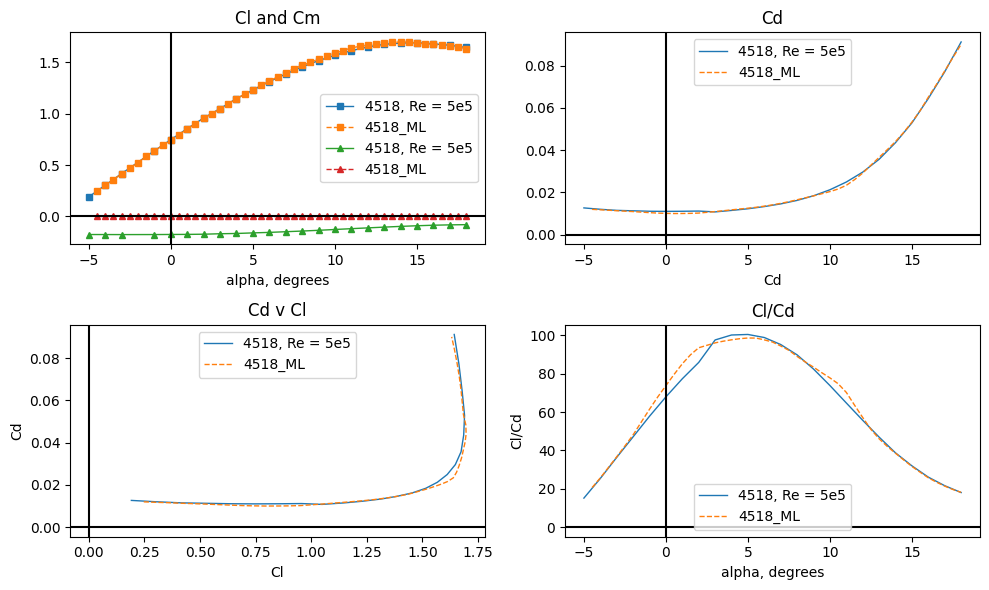

In [17]:
import pickle
import os
from dataplotter import plot_polars 
from dataplotter import compare_airfoils 
import tensorflow as tf
import numpy as np
from classifier_objects import Airfoil

data_path = '../data/airfoil_data/NACAxxxx_pkl/'

with open(data_path + '/NACA2224.pkl', 'rb') as f:
    airfoil1 = pickle.load(f)
with open(data_path + '/NACA6311.pkl', 'rb') as f:
    airfoil2 = pickle.load(f)

# airfoil.plot_geometry()


# airfoil.NACA_geometry_generator()
# print(airfoil.name)
airfoil1 = airfoil1.data_search()
airfoil2 = airfoil2.data_search()

# print(airfoil.polars.keys())
# plot_polars(airfoil, "all", MaSi=2, LiWi=1)

# compare_airfoils(airfoil1, airfoil2, 500000)

with open(data_path + '/NACA6518.pkl', 'rb') as f:
    airfoil3 = pickle.load(f)

print(airfoil3.polars.keys())
airfoil3 = airfoil3.data_search()
print(airfoil3.polars.keys())

airfoil3_ML = Airfoil(name="NACA6518")

model_path = '../VM_Main/'
Cl_model =  tf.keras.models.load_model(model_path + "MLP4regression_CL.h5")
Cd_model =  tf.keras.models.load_model(model_path + "MLP4regression_CD.h5")
Cm_model =  tf.keras.models.load_model(model_path + "MLP4regression_CM.h5")


ML_polar_map = {}
AoA_range = np.arange(-4.5, 18.5, 0.5)
Re = 400000
AoA_Step = 1
ML_airfoil = "NACA6518"
polar_matrix = []
c = 0
Ran = len(AoA_range)

x_input = np.column_stack((AoA_range, np.tile(float(Re), Ran), np.tile(float(ML_airfoil[4]), Ran), np.tile(float(ML_airfoil[5]), Ran), np.tile(float(ML_airfoil[6:]), Ran)))
x_input_ = x_input.reshape(len(AoA_range), 5)
x_input__ = x_input_ / np.array([18.0, 1000000, 6.0, 9.0, 39.0])

Cl_ = Cl_model(x_input__)
Cd_ = Cd_model(x_input__)
Cm_ = Cm_model(x_input__)

polar_matrix = np.column_stack((AoA_range, Cl_, Cd_, Cm_, np.tile(0.0, Ran), Cl_ / Cd_))

airfoil3_ML.polar_update(Re, np.array(polar_matrix)) 


compare_airfoils(airfoil3, airfoil3_ML, Re, Lab1="4518, Re = 5e5", Lab2="4518_ML")

In [ ]:
Cl_m =  tf.keras.models.load_model(model_path + "MLP4regression_CL.h5")
import numpy as np
import matplotlib.pyplot as plt
import math

def import_geometry(file_name):
    """
    The file should contain x and y coordinates in each column. 
    Though for different type of coordinate stroges I can update inside. 
    """
    
    file = []

    with open(file_name) as f:
        for line in f:
            file.append(line.split())

    #convert the data to floats
    for i in range(len(file)):
        for j in range(len(file[i])):
            file[i][j] = float(file[i][j])

    return np.array(file)

def rotate(geometry, alpha):
    """
        x: x coordinates of airfoil
        y: y coordinates of airfoil
        angle: angle to rotate airfoil
    """
    #The rotation of the airfoil needed to be done rom its trailing edge.
    #Carry translation to the origin

    #The rotation of the airfoil needed to be done rom its trailing edge.
    # 
    #Carry translation to the origin
    geometry[:,0] = geometry[:,0] - geometry[0,0]
    geometry[:,1] = geometry[:,1] - geometry[0,1]
    
    x_rotated = []
    y_rotated = []
    x = geometry[:, 0]
    y = geometry[:, 1]

    angle = math.radians(alpha)

    for i in range(len(x)):
        x_rotated.append(x[i] * math.cos(angle) - y[i] * math.sin(angle))
        y_rotated.append(x[i] * math.sin(angle) + y[i] * math.cos(angle))

    geometry_rotated = np.array([x_rotated, y_rotated]).T
    return geometry_rotated
    

naca0012 = import_geometry('naca6920.txt')
# NACA6920

alpha_range = [5, 9]


plt.figure(1, facecolor='#212121', figsize=(15, 5))
ax = plt.axes()
ax.set_facecolor("#424242")
#Tick color
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
#Axis color
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
#Label color
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
#draw plot with predefined colors
geometry_rotated = rotate(naca0012, -12)
plt.plot(geometry_rotated[:,0], geometry_rotated[:,1], '--', color='#00AFFF', linewidth=2)
#plot a line from its trailing edge to leading edge
plt.plot([geometry_rotated[0,0], geometry_rotated[61,0]], [geometry_rotated[0,1], geometry_rotated[61,1]], '-', color='#00AFFF', linewidth=1.6)
geometry_rotated = rotate(naca0012, 3)
plt.figure(1, figsize=(15, 5))

plt.xlim(-1.1, 0.1)
plt.ylim(-0.3, 0.3)
#add x-y axis
plt.axhline(y=0, color='#fffafa', linewidth=1.1)
plt.axvline(x=0, color='#fffafa', linewidth=1.1)

plt.plot(geometry_rotated[:,0], geometry_rotated[:,1], '--', color='#44ffff', linewidth=2)
plt.plot([geometry_rotated[0,0], geometry_rotated[64,0]], [geometry_rotated[0,1], geometry_rotated[64,1]], '-', color='#44ffff', linewidth=1.6)


plt.show()

plt.figure(figsize=(5, 10))
plt.plot(naca0012[:, 0], naca0012[:,1], 'b-')    
plt.show()
